In [1]:
import tensorflow as tf
try:
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver()
    print(1)
    tf.config.experimental_connect_to_cluster(tpu)
    print(2)
    tf.tpu.experimental.initialize_tpu_system(tpu)
    print(3)
    strategy = tf.distribute.TPUStrategy(tpu)
    print(4)
    BATCH_SIZE = strategy.num_replicas_in_sync * 4
    print("Running on TPU:", tpu.master())
    print(f"Batch Size good: {BATCH_SIZE}")
    
except ValueError:
    strategy = tf.distribute.get_strategy()
    BATCH_SIZE = 32
    print(f"Running on {strategy.num_replicas_in_sync} replicas")
    print(f"Batch Size: {BATCH_SIZE}")  

KeyboardInterrupt: 

In [1]:




import numpy as np 
import pandas as pd 




import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))




In [2]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

def plot_roc(y_test, y_pred):
    
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

In [ ]:
!pip install seaborn


[notice] A new release of pip is available: 23.0.1 -> 23.3.2
[notice] To update, run: pip install --upgrade pip


In [3]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

def plot_confusion_matrix(y_test, y_pred):
    
    y_pred_class = np.where(y_pred > 0.5, 1, 0)  

    cm = confusion_matrix(y_test, y_pred_class)

    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d')
    plt.xlabel('Predicted')
    plt.ylabel('Truth')
    plt.show()

In [ ]:
import matplotlib.pyplot as plt

def plot_accuracy(history):
    
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

def plot_loss(history):
    
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

In [ ]:
from IPython.display import clear_output

In [4]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import pandas as pd
from sklearn.model_selection import train_test_split

train1=pd.read_csv("/kaggle/input/daigt-v2-train-dataset/train_v2_drcat_02.csv")


train2=pd.read_csv("/kaggle/input/llm-detect-ai-generated-text-deobfuscation/train_from_LLM-Detect_AI-GT_1MNB-3SGD.csv")
train2 = train2.drop(['id','prompt_id'], axis=1)

train = pd.concat([train1, train2])


FileNotFoundError: [Errno 2] No such file or directory: '/kaggle/input/daigt-v2-train-dataset/train_v2_drcat_02.csv'

In [5]:
import collections
import matplotlib.pyplot as plt
import pandas as pd

def plot_words(dataset, nwords):
    
    words = [word for text in dataset['text'] for word in text.split()]

    
    word_counts = collections.Counter(words)

    
    word_counts_df = pd.DataFrame(word_counts.most_common(), columns=['word', 'frequency'])

    
    N = nwords
    plt.figure(figsize=(10, 5))
    plt.bar(word_counts_df['word'][:N], word_counts_df['frequency'][:N])
    plt.title('Frequency of the top {} most common words'.format(N))
    plt.xlabel('Words')
    plt.ylabel('Frequency')
    plt.xticks(rotation=-45)
    plt.show()
    

In [ ]:
def preprocess_data(dataset):
    
    tokenizer = Tokenizer(oov_token="<OOV>")
    tokenizer.fit_on_texts(dataset['text'])
    sequences = tokenizer.texts_to_sequences(dataset['text'])
    padded_sequences = pad_sequences(sequences, padding='post')
    return padded_sequences

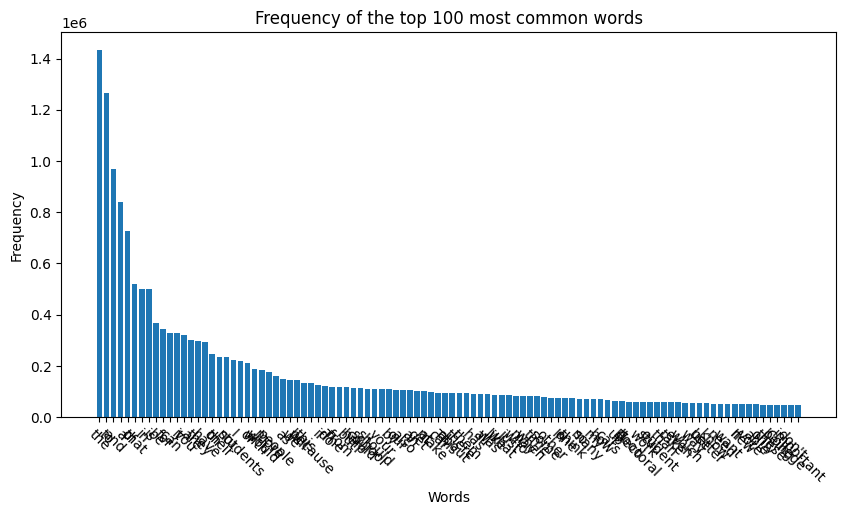

In [ ]:

plot_words(train, 100)

Applichiamo delle tecniche di data cleaning per le parole

In [ ]:
!pip install nltk


[notice] A new release of pip is available: 23.0.1 -> 23.3.2
[notice] To update, run: pip install --upgrade pip


In [4]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))

important_words = {'not', 'no', 'up', 'down', 'above', 'below', 'more', 'less', 'most', 'least', 'too', 'very', 'so', 'just', 'but', 'only'}
stop_words = stop_words - important_words

lemmatizer = WordNetLemmatizer()

def clean_text(text):
    text = text.lower()  
    text = ' '.join([word for word in text.split() if word not in stop_words])  
    text = ' '.join([lemmatizer.lemmatize(word) for word in text.split()])  
    return text

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\danie\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\danie\AppData\Roaming\nltk_data...


In [ ]:
train['text'] = train['text'].apply(clean_text)

Riplottiamo ora il grafico

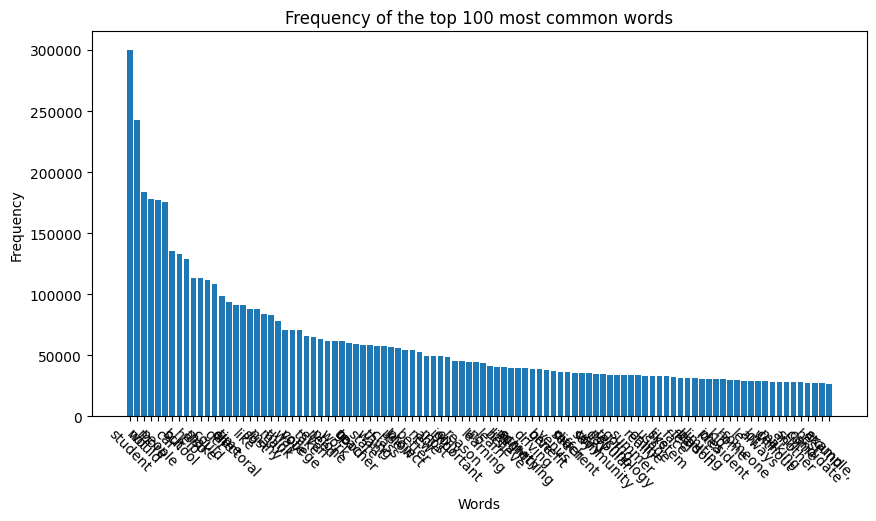

In [ ]:
plot_words(train, 100)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(preprocess_data(train), train['label'], test_size=0.2)

NameError: name 'preprocess_data' is not defined

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(72891, 993)
(18223, 993)
(72891,)
(18223,)


In [ ]:
print(X_train[0])

[  307  5894 15221   323   264   964  1232   346     3    14    67   146
   490     8    26    23    55  1124  1667    93    55    67   146  1215
    14    90    39    14    90    11    64    88   977  8849  1056   102
   100     2    67   146    86    31   271   199   694     3    90  3006
    90    11  2348   587    29   490    67   146  1271   485  7707     2
     3   694    67   146   485   587    29     3   488  2348   485    42
   233    67   146   587    29   149  1667   301    55   290   694    64
    82  2917   835 14031     3    33  2760    10    67   146  2587    11
  2348     3    33   345    61   157   121    24   798    99    41     3
    86    27   166    61  1667   753   960    55    26    14    54    67
   146   499  1563  1668    34   849   388   987    20   184  1869  1310
    34    63    35   365    34    63   324  3967    26   105  4271     4
   324  1422   298    10   123   805    29  1028   358   220    54   849
   987    20  1243   424  1869    10    54   262  1

In [16]:
from tensorflow.keras import regularizers
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(10000, 256, input_length=512),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation='sigmoid')
])


model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])


In [17]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 512, 256)          2560000   
                                                                 
 flatten_4 (Flatten)         (None, 131072)            0         
                                                                 
 dense_12 (Dense)            (None, 512)               67109376  
                                                                 
 dropout_9 (Dropout)         (None, 512)               0         
                                                                 
 dense_13 (Dense)            (None, 256)               131328    
                                                                 
 dropout_10 (Dropout)        (None, 256)               0         
                                                                 
 dense_14 (Dense)            (None, 128)              

In [ ]:

history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))


Epoch 1/10


2023-12-24 17:19:17.573193: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority unimplemented for this stream.
2023-12-24 17:19:17.590024: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority unimplemented for this stream.
2023-12-24 17:19:17.606912: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority unimplemented for this stream.
2023-12-24 17:19:17.623305: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority unimplemented for this stream.
2023-12-24 17:19:17.639988: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority unimplemented for this stream.
2023-12-24 17:19:17.656652: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority unimplemented for this stream.
2023-12-24 17:19:17.673509: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority un

  16/2278 [..............................] - ETA: 26s - loss: 8.4177 - accuracy: 0.5840 

2023-12-24 17:19:23.059812: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority unimplemented for this stream.
2023-12-24 17:19:23.059937: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority unimplemented for this stream.
2023-12-24 17:19:23.060002: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority unimplemented for this stream.
2023-12-24 17:19:23.060097: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority unimplemented for this stream.
2023-12-24 17:19:23.060205: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority unimplemented for this stream.
2023-12-24 17:19:23.060336: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority unimplemented for this stream.
2023-12-24 17:19:23.060455: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority un

 595/2278 [======>.......................] - ETA: 18s - loss: 0.6636 - accuracy: 0.9348

2023-12-24 17:19:29.349890: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority unimplemented for this stream.


1104/2278 [=============>................] - ETA: 12s - loss: 0.4227 - accuracy: 0.9605

2023-12-24 17:19:34.865096: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority unimplemented for this stream.
2023-12-24 17:19:34.910525: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority unimplemented for this stream.
2023-12-24 17:19:34.910638: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority unimplemented for this stream.


1572/2278 [===================>..........] - ETA: 7s - loss: 0.3331 - accuracy: 0.9695

2023-12-24 17:19:39.922848: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority unimplemented for this stream.


2036/2278 [=========================>....] - ETA: 2s - loss: 0.2852 - accuracy: 0.9743

2023-12-24 17:19:44.925860: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority unimplemented for this stream.


2278/2278 [==============================] - 36s 14ms/step - loss: 0.2674 - accuracy: 0.9762 - val_loss: 0.1083 - val_accuracy: 0.9920
Epoch 2/10
  85/2278 [>.............................] - ETA: 24s - loss: 0.1026 - accuracy: 0.9923

2023-12-24 17:19:54.918840: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority unimplemented for this stream.


2278/2278 [==============================] - 29s 13ms/step - loss: 0.0974 - accuracy: 0.9940 - val_loss: 0.1101 - val_accuracy: 0.9923
Epoch 3/10
2278/2278 [==============================] - 29s 13ms/step - loss: 0.0839 - accuracy: 0.9946 - val_loss: 0.0837 - val_accuracy: 0.9916
Epoch 4/10
2278/2278 [==============================] - 29s 13ms/step - loss: 0.0819 - accuracy: 0.9955 - val_loss: 0.0854 - val_accuracy: 0.9964
Epoch 5/10
2278/2278 [==============================] - 29s 13ms/step - loss: 0.0728 - accuracy: 0.9963 - val_loss: 0.1136 - val_accuracy: 0.9935
Epoch 6/10
2278/2278 [==============================] - 29s 13ms/step - loss: 0.0723 - accuracy: 0.9963 - val_loss: 0.0751 - val_accuracy: 0.9936
Epoch 7/10
2278/2278 [==============================] - 29s 13ms/step - loss: 0.0712 - accuracy: 0.9967 - val_loss: 0.0644 - val_accuracy: 0.9959
Epoch 8/10
2278/2278 [==============================] - 29s 13ms/step - loss: 0.0634 - accuracy: 0.9967 - val_loss: 0.0467 - val_accura

In [ ]:

loss, accuracy = model.evaluate(X_test, y_test)
print(f'Loss: {loss}\nAccuracy: {accuracy}')

570/570 [==============================] - 5s 8ms/step - loss: 0.0657 - accuracy: 0.9958
Loss: 0.06568747013807297
Accuracy: 0.9958294630050659


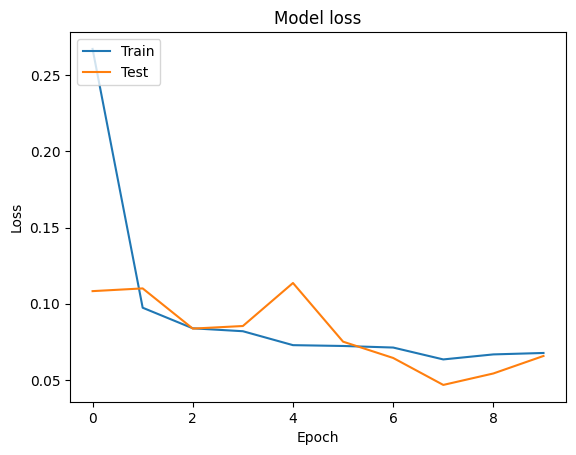

In [ ]:
plot_loss(history)

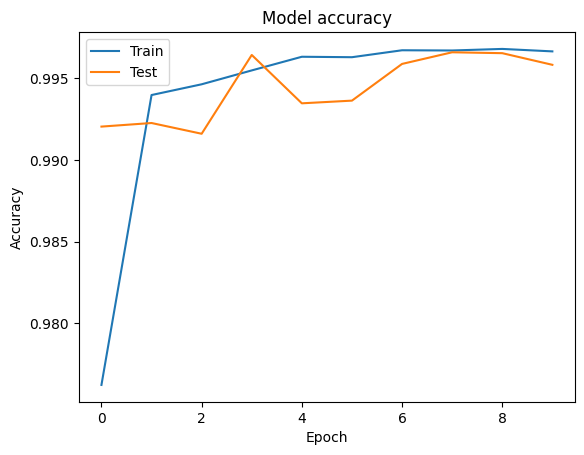

In [ ]:
plot_accuracy(history)

In [ ]:
y_pred = model.predict(X_test)

2023-12-24 17:25:20.432675: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node AssignAddVariableOp.


570/570 [==============================] - 6s 8ms/step


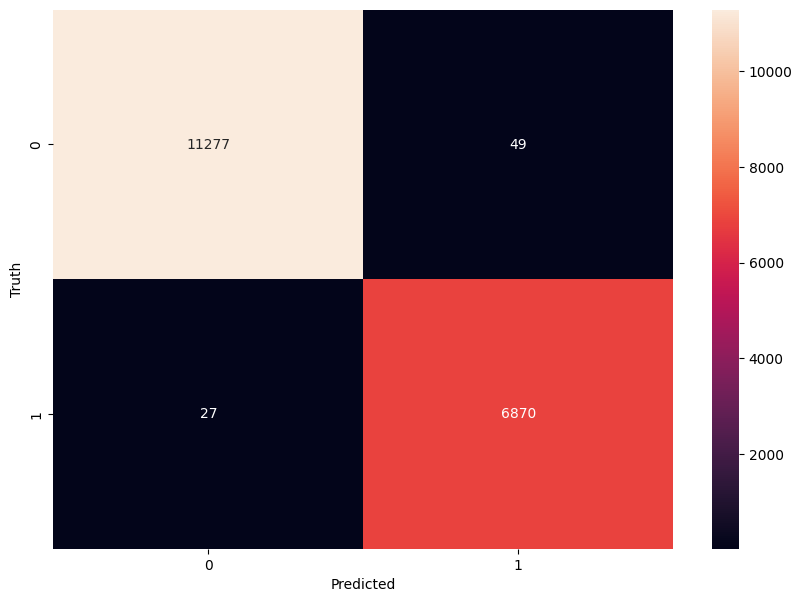

In [ ]:
plot_confusion_matrix(y_test, y_pred)

In [ ]:
plot_roc(y_test, y_pred)